Simple Linear Regression
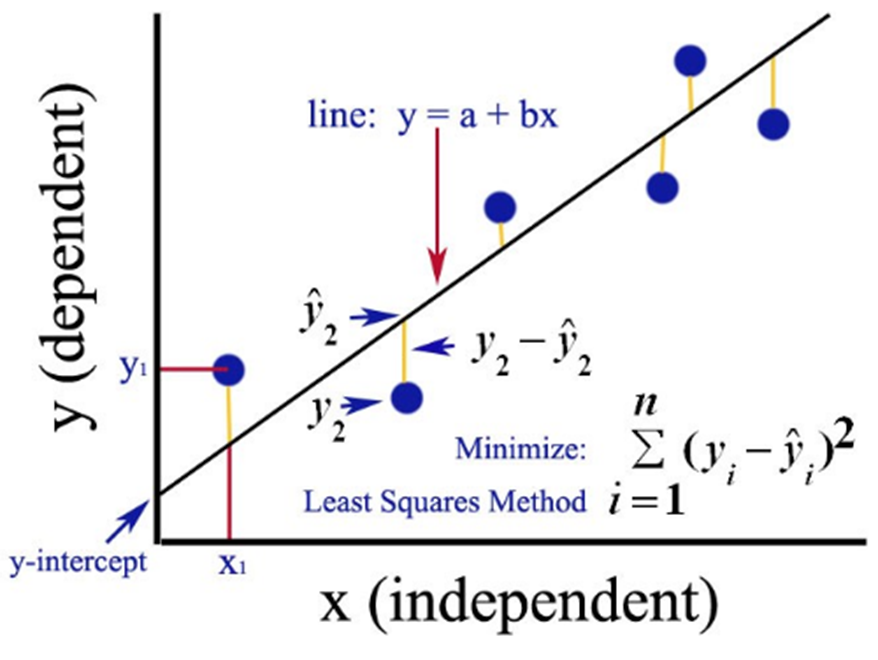

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Reading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

## PROFIT ~ RND
## PROFIT is target feature (Which im trying to predict based on RND budet of startup)
## PROFIT_pred = B0 + B1*RND
## Seperate X and Y from the dataframe

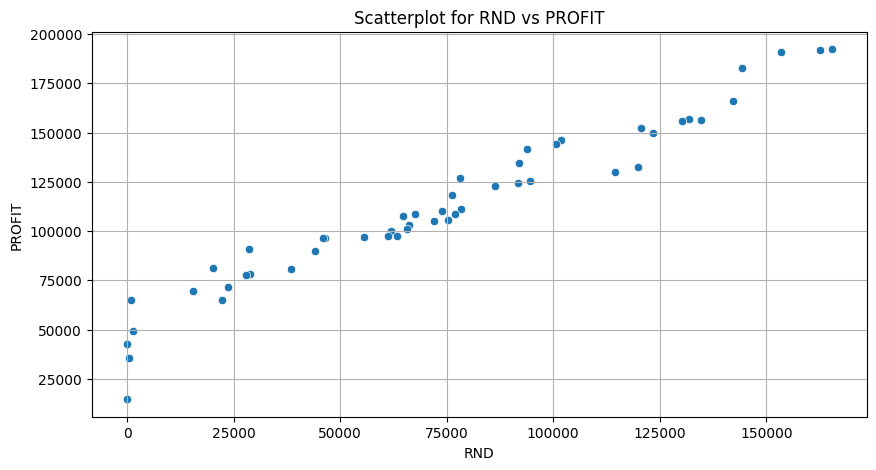

In [7]:
#Visualize RND vs PROFIT
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='RND',y='PROFIT')
plt.title('Scatterplot for RND vs PROFIT')
plt.grid()
plt.show()

Separated X and Y terms

In [8]:
X=df[['RND']]
Y=df[['PROFIT']]

In [9]:
X

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [10]:
Y

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


Create a linear regression model

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [12]:
B1=model.coef_
B1

array([[0.85429137]])

In [13]:
B0=model.intercept_
B0

array([49032.89914125])

PROFIT_pred = 49032.90 + 0.8543*RND

Evaluate the model

In [14]:
r2=model.score(X,Y)
r2

0.9465353160804393

As im getting r2 score of 0.9465 the model is a good model as r2>=0.8


Visulize the fitted straight line

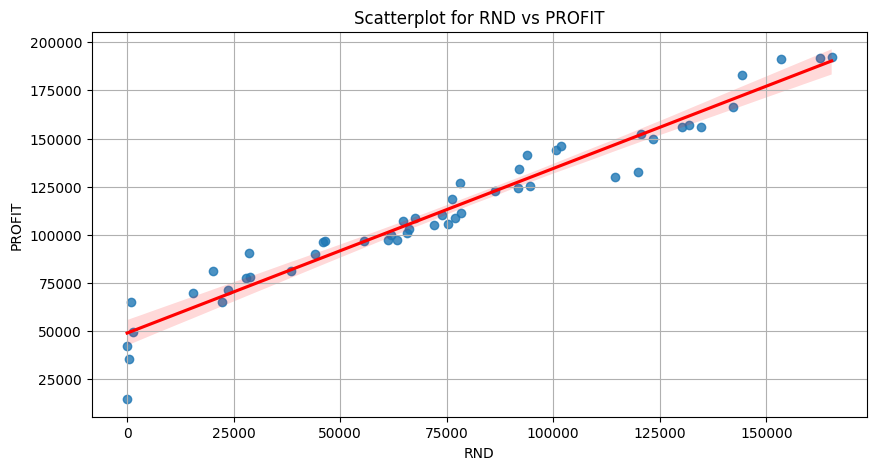

In [15]:
# Visulaize RND vs PROFIT
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'})
plt.title('Scatterplot for RND vs PROFIT')
plt.grid()
plt.show()

Estimate the prediced values by the model

In [16]:
ypred=model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [17]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Estimate the other metrics MSE, RMSE , MAE, MAPE, R2

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [19]:
mse=mean_squared_error(Y,ypred)
mse

85120931.32706906

In [21]:
rmse=mse**(1/2)
rmse

9226.100548285232

In [22]:
mae=mean_absolute_error(Y,ypred)
mae

6910.98435457961

In [23]:
mape=mean_absolute_percentage_error(Y,ypred)
mape

0.11070141081984847

In [24]:
r2=r2_score(Y,ypred)
r2

0.9465353160804393

Above model has a good r2 score of 0.9465 which more than 0.8


Predciting PROFIT for a given RND value

In [25]:
rnd=[[150000]]
model.predict(rnd)

array([[177176.60478207]])

PROFIT_pred = 49032.90 + 0.8543*RND

In [26]:
49032.90 + 0.8543*150000

177177.9

Predicting multiple values

In [27]:
rnds = [[50000], [120000], [150000], [200000], [230000]]
profits = model.predict(rnds)
profits

array([[ 91747.46768819],
       [151547.86365391],
       [177176.60478207],
       [219891.17332901],
       [245519.91445718]])

## 1. RND increases by 1000 , profit increases by 854.3
## 2. RND and PROFIT have strong linear relationship because of good r2 score of 0.9465